In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../DATA/DataHackathon.xlsx')

In [4]:
df[df['Cantidad'] % 1000 == 0]

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Cantidad,Unidad de venta
25,ABC063868,2021-01-05,D0B40618,IVP10009,6000,KG
194,ABC063949,2021-01-08,413B722C,IVP07349,54000,KG
221,ABC063928,2021-01-08,0598F2F5,IVP07436,3000,KG
222,ABC063928,2021-01-08,0598F2F5,IVP07436,3000,KG
405,ABC064086,2021-01-15,D0B40618,IVP10009,9000,KG
...,...,...,...,...,...,...
30332,ABC083461,2023-11-27,D4C576EB,IVP11576,9000,L
30558,ABC083622,2023-12-06,339192DF,IVP07622,3000,KG
30655,ABC083708,2023-12-11,F6F39D95,IVP07384,3000,KG
31084,ABC083935,2023-12-22,71C9A747,IVP11719,3000,L


In [5]:
for i in range(len(df)):
  if df.loc[i, 'Cantidad'] == 0:
    df.loc[i, 'Cantidad'] = df.loc[i, 'Cantidad'] / 1000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31156 entries, 0 to 31155
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Orden de Venta           31156 non-null  object        
 1   Creacion Orden de Venta  31156 non-null  datetime64[ns]
 2   Codigo Cliente           31156 non-null  object        
 3   Articulo                 31156 non-null  object        
 4   Cantidad                 31156 non-null  int64         
 5   Unidad de venta          31156 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


**orden de venta**

In [7]:
orden_venta = df['Orden de Venta']

In [8]:
orden_venta.describe()

count         31156
unique        18409
top       ABC083011
freq            104
Name: Orden de Venta, dtype: object

**Creacion Orden de Venta**

In [9]:
creacion_orden_venta = df['Creacion Orden de Venta']

In [10]:
creacion_orden_venta.describe()

count                            31156
mean     2022-06-19 01:04:17.439979264
min                2021-01-04 00:00:00
25%                2021-09-15 00:00:00
50%                2022-06-14 00:00:00
75%                2023-03-14 00:00:00
max                2023-12-29 00:00:00
Name: Creacion Orden de Venta, dtype: object

In [11]:
creacion_orden_venta.unique().size

883

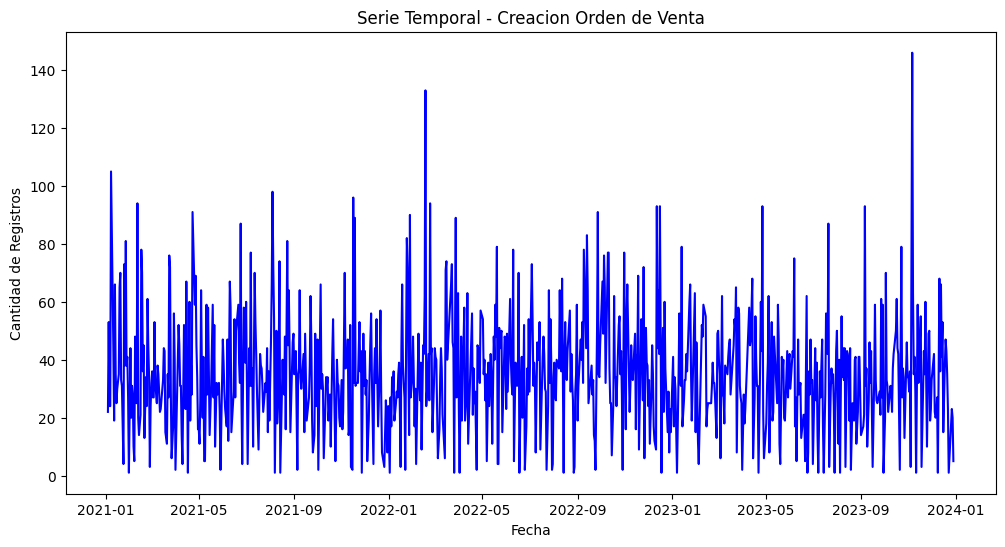

In [12]:
creacion_orden_venta = pd.to_datetime(creacion_orden_venta)

serie = df.groupby(creacion_orden_venta).size()

plt.figure(figsize=(12,6))
plt.plot(serie, color='blue')

plt.title('Serie Temporal - Creacion Orden de Venta')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.show()

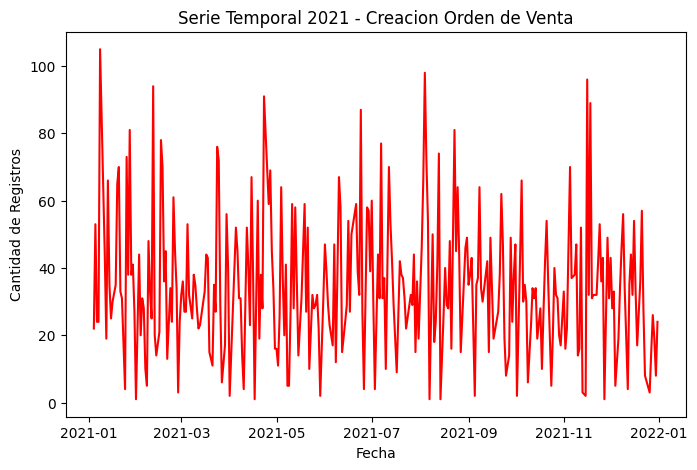

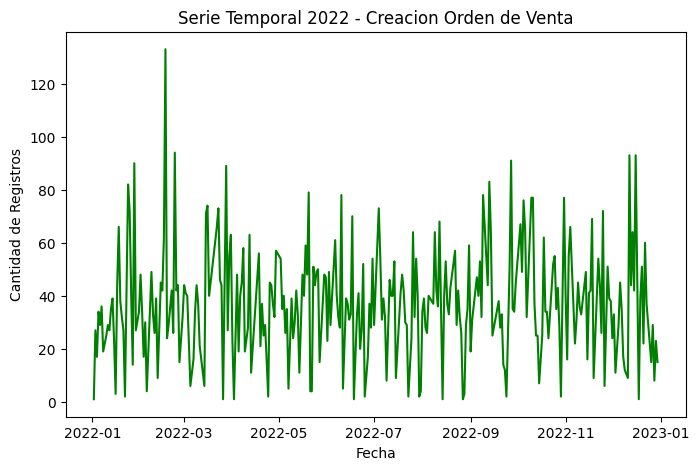

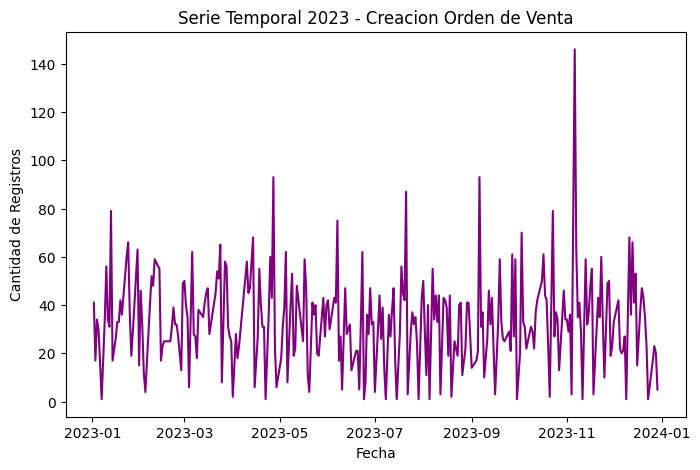

In [13]:
# SERIE 2021
serie_2021 = serie.loc['2021']

plt.figure(figsize=(8,5))
plt.plot(serie_2021, color='red')

plt.title('Serie Temporal 2021 - Creacion Orden de Venta')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.show()

# SERIE 2022
serie_2022 = serie.loc['2022']

plt.figure(figsize=(8,5))
plt.plot(serie_2022, color='green')

plt.title('Serie Temporal 2022 - Creacion Orden de Venta')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.show()

# SERIE 2023
serie_2023 = serie.loc['2023']

plt.figure(figsize=(8,5))
plt.plot(serie_2023, color='purple')

plt.title('Serie Temporal 2023 - Creacion Orden de Venta')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.show()


Text(0, 0.5, 'Cantidad de Registros')

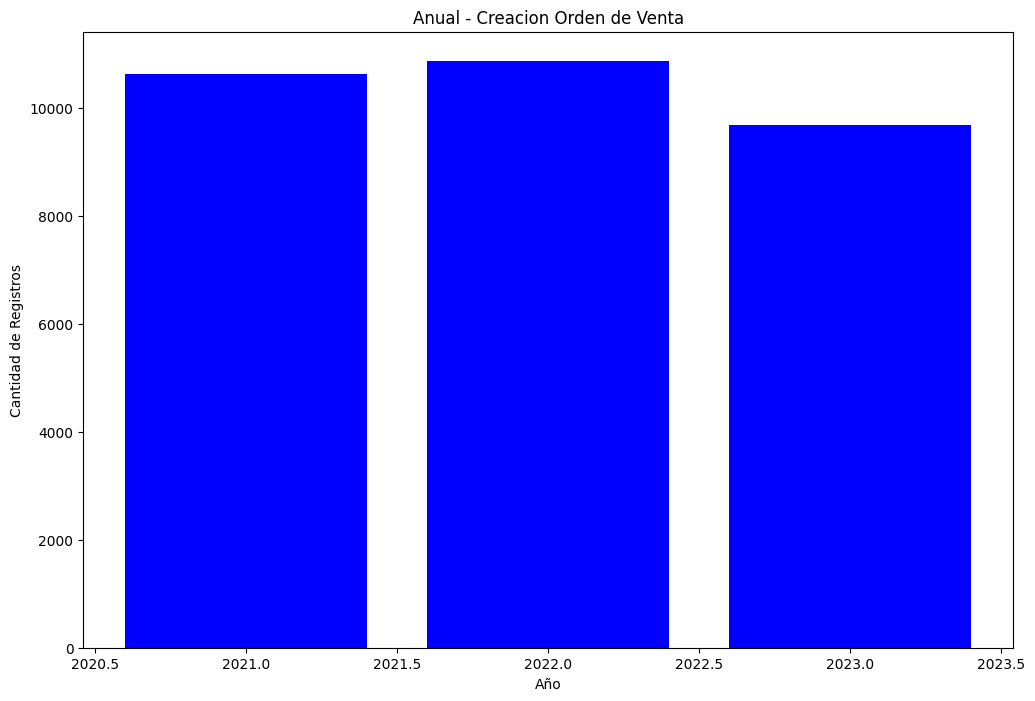

In [14]:
serie_anual = df.groupby(creacion_orden_venta.dt.year).size()

plt.figure(figsize=(12,8))
plt.bar(serie_anual.index, serie_anual.values, color='blue')

plt.title('Anual - Creacion Orden de Venta')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')

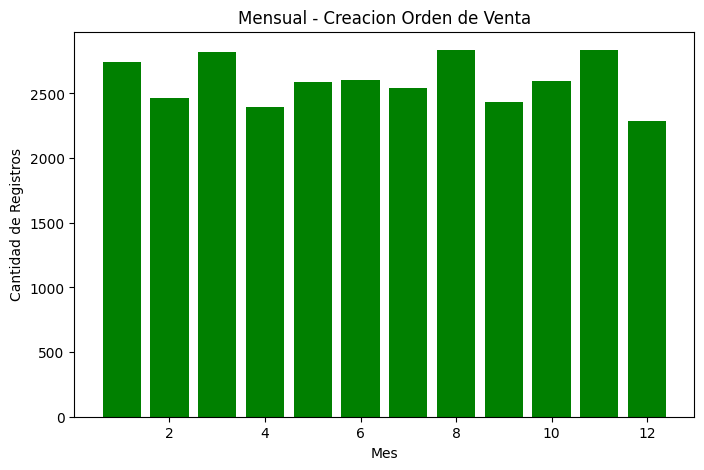

In [15]:
serie_mensual = df.groupby(creacion_orden_venta.dt.month).size()

plt.figure(figsize=(8,5))
plt.bar(serie_mensual.index, serie_mensual.values, color='green')

plt.title('Mensual - Creacion Orden de Venta')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.show()

Text(0, 0.5, 'Cantidad de Registros')

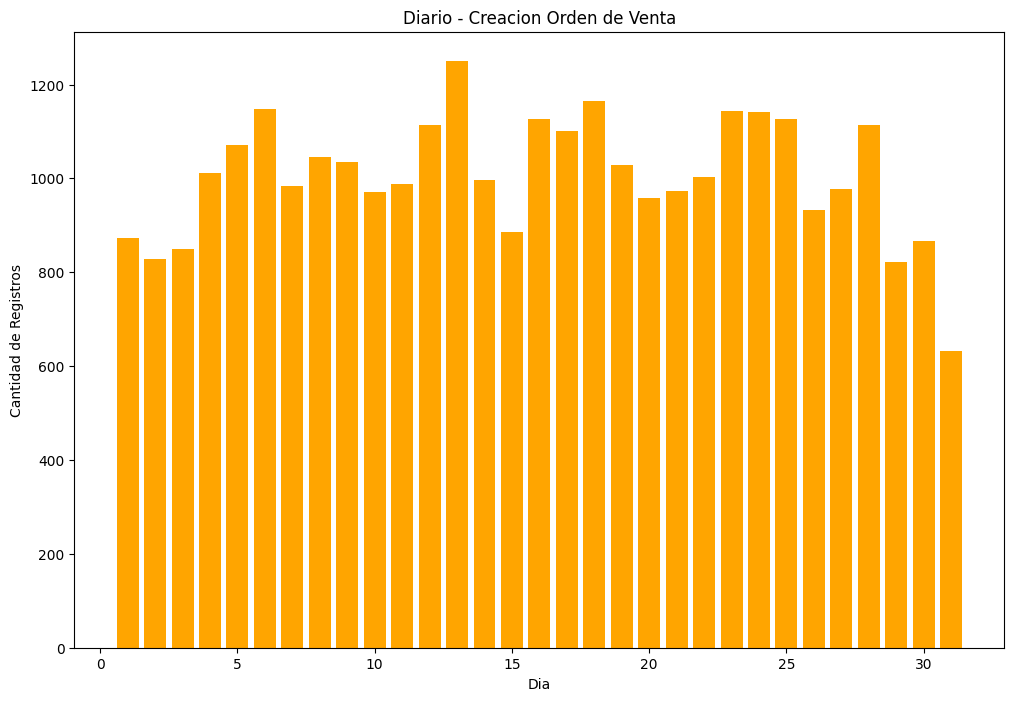

In [16]:
serie_anual = df.groupby(creacion_orden_venta.dt.day).size()

plt.figure(figsize=(12,8))
plt.bar(serie_anual.index, serie_anual.values, color='orange')

plt.title('Diario - Creacion Orden de Venta')
plt.xlabel('Dia')
plt.ylabel('Cantidad de Registros')

**Codigo Cliente**

In [17]:
codigo_cliente = df['Codigo Cliente']

In [18]:
codigo_cliente.describe()

count        31156
unique         907
top       A760F354
freq          2064
Name: Codigo Cliente, dtype: object

In [19]:
codigo_cliente.value_counts().head(10)

Codigo Cliente
A760F354    2064
F6F39D95    1399
A319D1B7    1141
8E948DF7     825
2C005B51     821
044600D2     780
EDD2371F     682
4D8CDE44     661
B678967B     611
68F46D1A     590
Name: count, dtype: int64

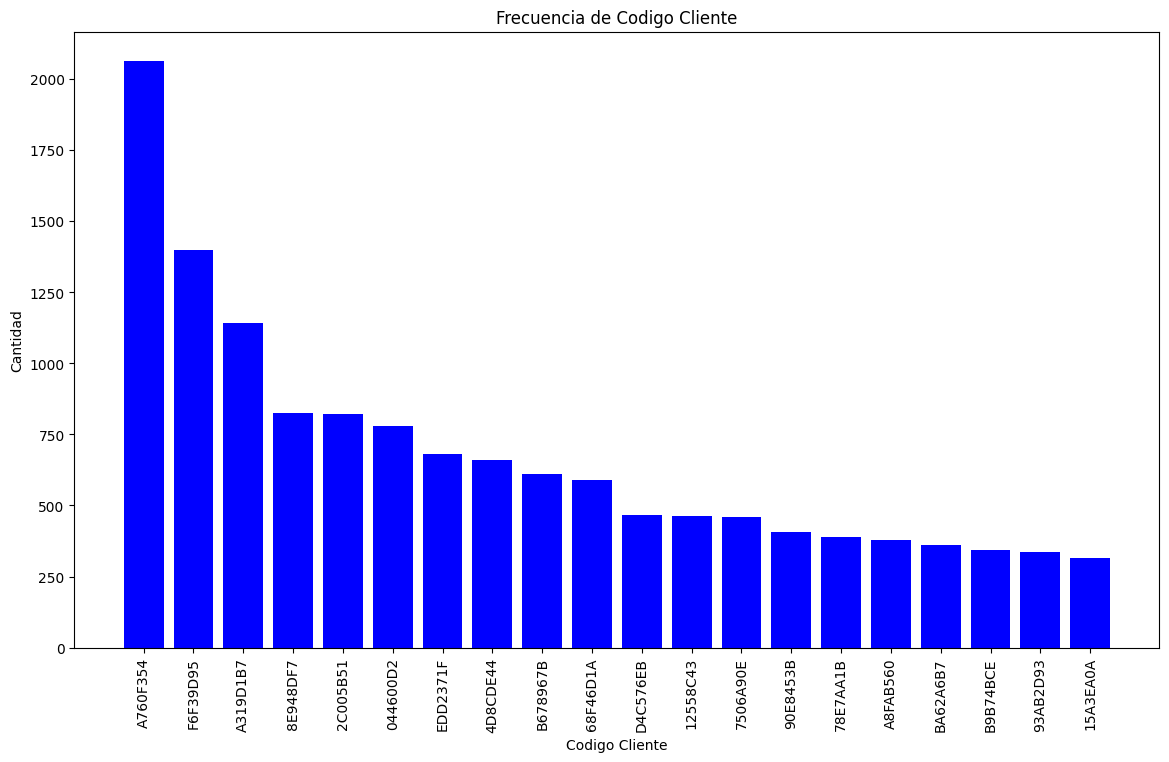

In [20]:
clientes_ord = codigo_cliente.value_counts().head(20)

plt.figure(figsize=(14,8))
plt.bar(clientes_ord.index.astype(str), clientes_ord.values, color='blue')

plt.title('Frecuencia de Codigo Cliente')
plt.xlabel('Codigo Cliente')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.show()

**Articulo**

In [21]:
articulo = df['Articulo']

In [22]:
articulo.describe()

count        31156
unique         889
top       IVP04039
freq          2148
Name: Articulo, dtype: object

In [23]:
articulo.value_counts().head(-5)

Articulo
IVP04039    2148
IVP07165     673
IVP04009     527
IVP11159     480
IVP11694     475
            ... 
IVP08050       1
IVP11726       1
IVP11729       1
IVP11727       1
IVP07623       1
Name: count, Length: 884, dtype: int64

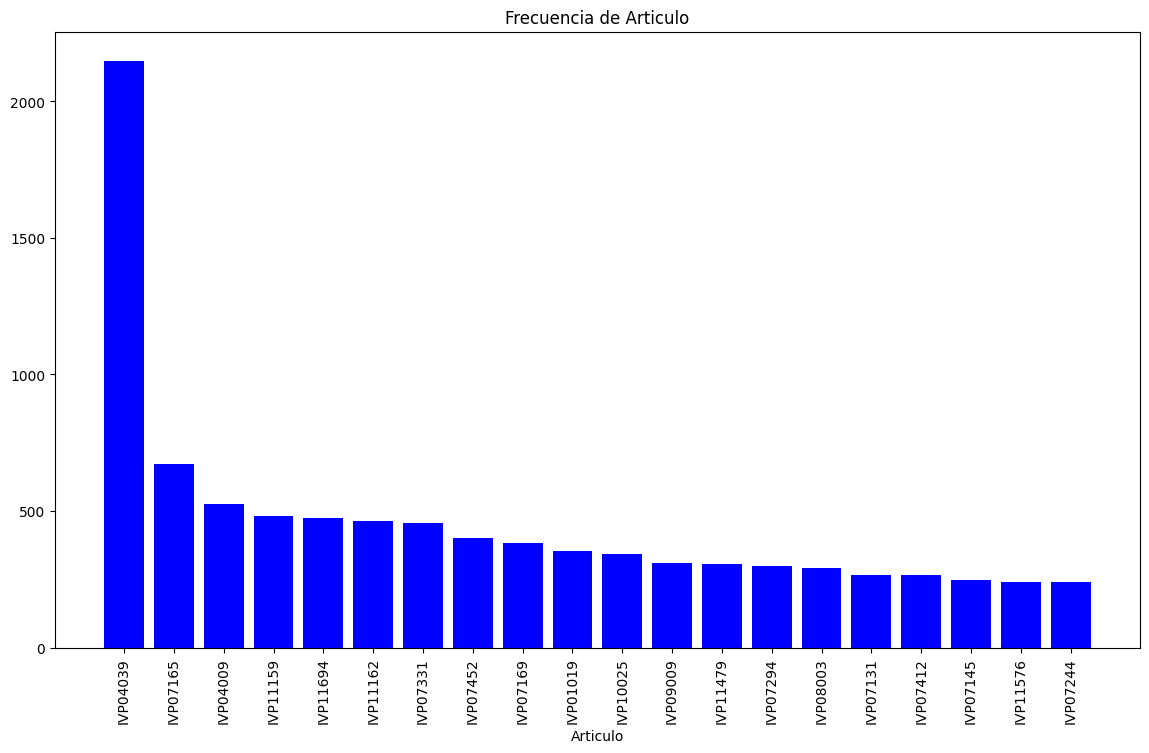

In [24]:
articulo_ord = articulo.value_counts().head(20)

plt.figure(figsize=(14,8))
plt.bar(articulo_ord.index.astype(str), articulo_ord.values, color='blue')

plt.title('Frecuencia de Articulo')
plt.xlabel('Articulo')
plt.xticks(rotation=90)
plt.show()

**Cantidad**

In [25]:
cantidad = df['Cantidad']

In [26]:
df_kg = df[df['Unidad de venta'] == 'KG'].groupby('Articulo')['Cantidad'].sum().sort_values(ascending=False)
df_kg.head(-5)

Articulo
IVP07349    4430524
IVP07099    1287522
IVP07094     573300
IVP09009     498960
IVP15060     449745
             ...   
IVP07340          1
IVP07310          1
IVP14011          1
IVP10034          1
IVP08050          1
Name: Cantidad, Length: 445, dtype: int64

In [27]:
df_L = df[df['Unidad de venta'] == 'L'].groupby('Articulo')['Cantidad'].sum().sort_values(ascending=False)
df_L.head(-5)

Articulo
IVP11576    358244
IVP11586    230449
IVP11144    228310
IVP11136    189529
IVP11162    179445
             ...  
IVP11484         4
IVP11281         4
IVP11674         3
IVP15229         3
IVP11020         3
Name: Cantidad, Length: 322, dtype: int64

In [28]:
df_pza = df[df['Unidad de venta'] == 'PZA'].groupby('Articulo')['Cantidad'].sum().sort_values(ascending=False)
df_pza.head(-5)

Articulo
IVP01021    78111
IVP04039    39222
IVP04009    30020
IVP15087    21107
IVP04001     7973
            ...  
IVP99389        1
IVP99388        1
IVP99393        1
IVP99392        1
IVP99391        1
Name: Cantidad, Length: 176, dtype: int64

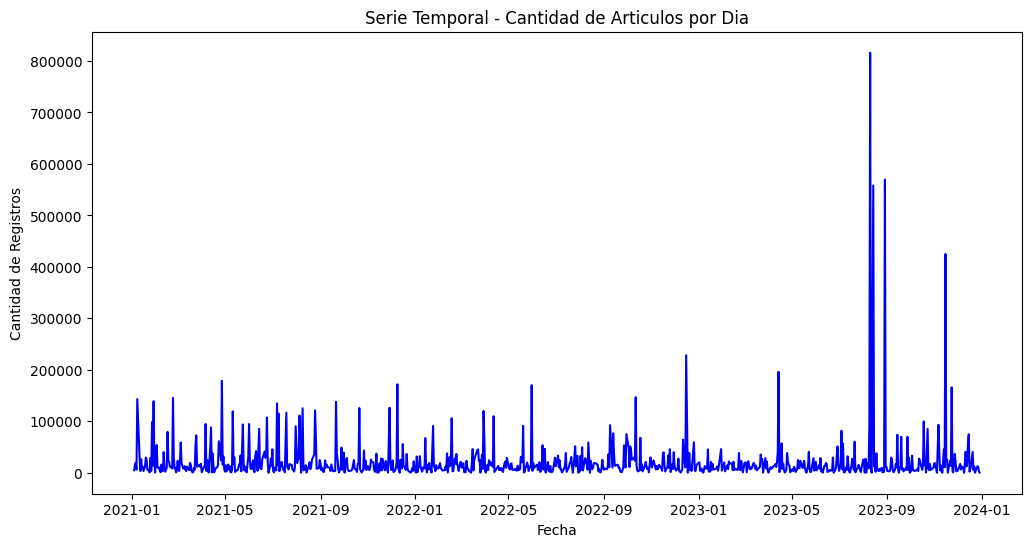

In [29]:
creacion_orden_venta = pd.to_datetime(creacion_orden_venta)

serie = df.groupby(creacion_orden_venta)['Cantidad'].sum()

plt.figure(figsize=(12,6))
plt.plot(serie, color='blue')

plt.title('Serie Temporal - Cantidad de Articulos por Dia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.show()

In [30]:
df[cantidad == 0].head(5)

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Cantidad,Unidad de venta
1021,ABC064502,2021-02-02,7506A90E,IVP11356,0,L
1658,ABC064953,2021-02-23,CAF07F07,IVP07489,0,KG
1751,ABC065030,2021-02-25,A760F354,IVP01012,0,L
2039,ABC065207,2021-03-06,B678967B,IVP14025,0,KG
2041,ABC065207,2021-03-06,B678967B,IVP14019,0,KG


**Unidad de Venta**

In [31]:
unidad_venta = df['Unidad de venta']

In [32]:
unidad_venta.value_counts()

Unidad de venta
KG     15462
L       9150
PZA     6544
Name: count, dtype: int64

In [33]:
unidad_venta.value_counts(normalize=True) * 100

Unidad de venta
KG     49.62768
L      29.36834
PZA    21.00398
Name: proportion, dtype: float64

<Axes: xlabel='Creacion Orden de Venta'>

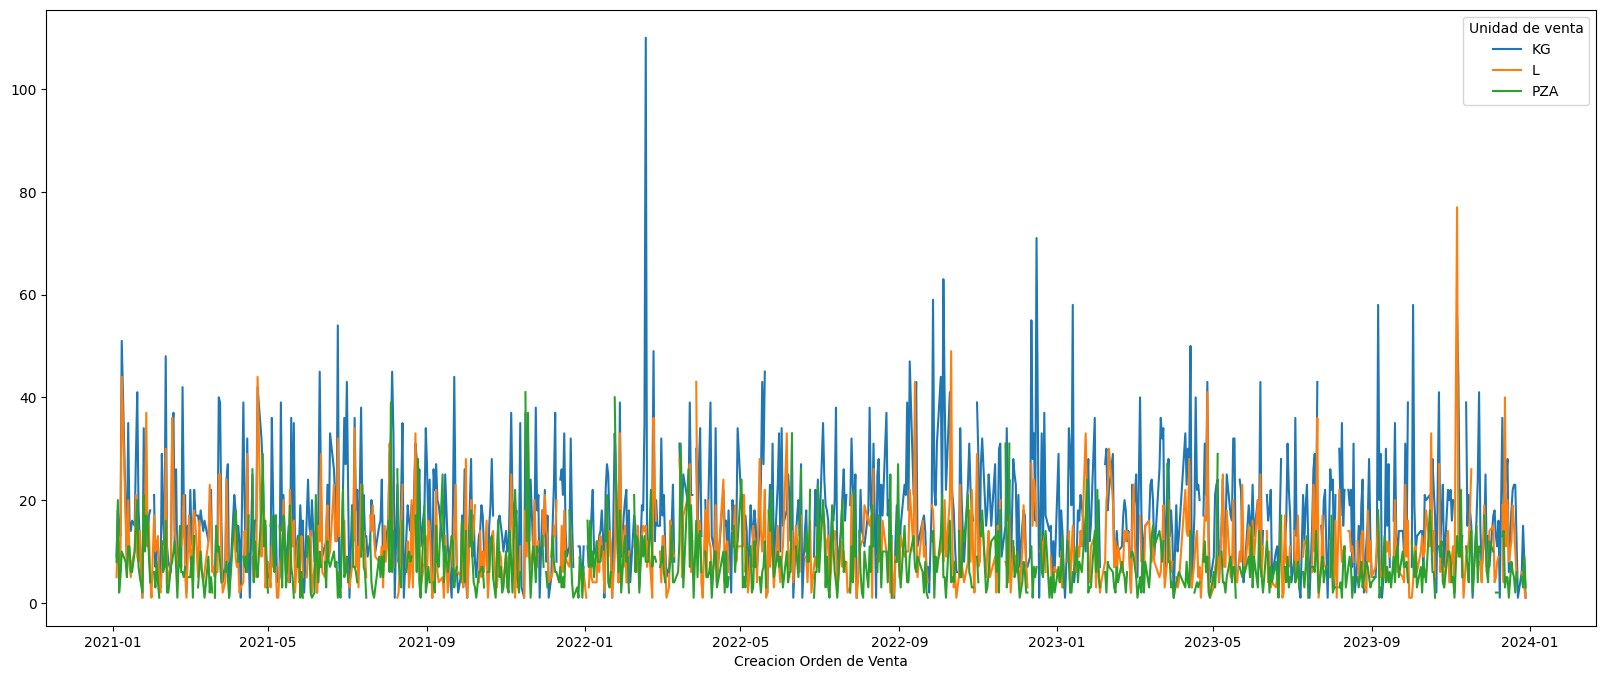

In [34]:
ventas_diarias = df.groupby([df['Creacion Orden de Venta'].dt.date, 'Unidad de venta']).size().unstack()
fig, ax = plt.subplots(figsize=(20, 8))
ventas_diarias.plot(ax=ax)

In [35]:
df.groupby('Unidad de venta')['Cantidad'].sum()

Unidad de venta
KG     14931634
L       4023954
PZA      246721
Name: Cantidad, dtype: int64

In [36]:
df.groupby(['Codigo Cliente', 'Unidad de venta']).size().unstack()

Unidad de venta,KG,L,PZA
Codigo Cliente,,,
10137936,1.0,NaN,NaN
24886010,2.0,NaN,NaN
33024008,1.0,NaN,NaN
53455581,NaN,3.0,NaN
56332349,3.0,NaN,NaN
...,...,...,...
FE9BAF68,NaN,1.0,NaN
FEA043F3,3.0,1.0,1.0
FEBC24B4,NaN,9.0,NaN


In [37]:
df.groupby(['Articulo', 'Unidad de venta']).size().unstack()

Unidad de venta,KG,L,PZA
Articulo,,,
GVP05169,NaN,NaN,1.0
IVP01004,NaN,4.0,NaN
IVP01006,NaN,11.0,NaN
IVP01007,NaN,7.0,NaN
IVP01009,NaN,NaN,40.0
...,...,...,...
IVP99416,NaN,NaN,1.0
IVP99435,NaN,NaN,1.0
IVP99469,NaN,NaN,2.0


In [38]:
df.groupby('Orden de Venta')['Articulo'].nunique().sort_values(ascending=False).head(10)

Orden de Venta
ABC067188    43
ABC077167    34
ABC076425    30
ABC066605    28
ABC073824    27
ABC083011    26
ABC078229    26
ABC063946    25
ABC068005    25
ABC063944    25
Name: Articulo, dtype: int64

In [39]:
df[df['Orden de Venta'] == 'ABC067188']

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Cantidad,Unidad de venta
5155,ABC067188,2021-06-24,F6F39D95,IVP07318,810,KG
5156,ABC067188,2021-06-24,F6F39D95,IVP07478,270,KG
5157,ABC067188,2021-06-24,F6F39D95,IVP10017,96,KG
5159,ABC067188,2021-06-24,F6F39D95,IVP07460,540,KG
5160,ABC067188,2021-06-24,F6F39D95,IVP07361,810,KG
5161,ABC067188,2021-06-24,F6F39D95,IVP07309,810,KG
5162,ABC067188,2021-06-24,F6F39D95,IVP07078,270,KG
5163,ABC067188,2021-06-24,F6F39D95,IVP07259,1080,KG
5164,ABC067188,2021-06-24,F6F39D95,IVP11562,142,L
5165,ABC067188,2021-06-24,F6F39D95,IVP10030,144,KG


In [40]:
df[df['Orden de Venta'] == 'ABC067188']['Cantidad'].sum()

np.int64(27988)

In [41]:
df[df['Orden de Venta'] == 'ABC067188']['Cantidad'][df['Unidad de venta'] == 'KG'].sum()

np.int64(23262)

In [42]:
df[df['Orden de Venta'] == 'ABC067188']['Cantidad'][df['Unidad de venta'] == 'L'].sum()

np.int64(4726)